In [2]:
import subprocess

eventid = "us6000rsy1"
eventpath=f'/Users/hyin/shakemap_profiles/default/data/{eventid}'

cmd = [
    f"/Users/hyin/soft/shakemap-postprocess-tools/getmoment.py",
    eventid,
    eventpath,
]

subprocess.run(cmd, check=True)


Writing event data to /Users/hyin/shakemap_profiles/default/data/us6000rsy1/us6000rsy1_event.json
Writing moment tensor data to /Users/hyin/shakemap_profiles/default/data/us6000rsy1/us6000rsy1_tensor.json


CompletedProcess(args=['/Users/hyin/soft/shakemap-postprocess-tools/getmoment.py', 'us6000rsy1', '/Users/hyin/shakemap_profiles/default/data/us6000rsy1'], returncode=0)

# Plot the CMT solution
https://docs.obspy.org/packages/obspy.imaging.html

In [33]:
### Read in CMT if provided
cmtfile = f"{eventpath}/{eventid}_tensor.json"
print(f"CMT solution provided: {cmtfile}")
# cmt = parse_cmtjson(cmtfile)

import json
with open(cmtfile, 'r') as json_file:
    cmt = json.load(json_file)
cmt

CMT solution provided: /Users/hyin/shakemap_profiles/default/data/us6000rsy1/us6000rsy1_tensor.json


{'indexid': '27521710',
 'indexTime': 1766815913478,
 'id': 'urn:usgs-product:us:moment-tensor:us_6000rsy1_mww:1766815899040',
 'type': 'moment-tensor',
 'code': 'us_6000rsy1_mww',
 'source': 'us',
 'updateTime': 1766815899040,
 'status': 'UPDATE',
 'properties': {'beachball-source': 'us',
  'depth': '10',
  'derived-depth': '11.5',
  'derived-eventtime': '2025-12-06T20:42:03.100Z',
  'derived-latitude': '60.6703',
  'derived-longitude': '-140.0776',
  'derived-magnitude': '7.0',
  'derived-magnitude-type': 'Mww',
  'evaluation-status': 'confirmed',
  'eventParametersPublicID': 'quakeml:us.anss.org/eventparameters/6000rsy1/1766815906',
  'eventsource': 'us',
  'eventsourcecode': '6000rsy1',
  'eventtime': '2025-12-06T20:41:49.300Z',
  'latitude': '60.3703',
  'longitude': '-139.4708',
  'n-axis-azimuth': '101',
  'n-axis-length': '5.81466E+18',
  'n-axis-plunge': '48',
  'nodal-plane-1-dip': '59.74',
  'nodal-plane-1-rake': '30.89',
  'nodal-plane-1-strike': '60.57',
  'nodal-plane-2-d

In [35]:
eventid = cmt["properties"]["eventsourcecode"]
eventid

'6000rsy1'

PyGMT information:
  version: v0.16.0
System information:
  python: 3.12.11 | packaged by conda-forge | (main, Jun  4 2025, 14:38:53) [Clang 18.1.8 ]
  executable: /Users/hyin/miniforge3/envs/shakemap/bin/python
  machine: macOS-15.7-arm64-arm-64bit
Dependency information:
  numpy: 1.26.4
  pandas: 2.3.1
  xarray: 2025.7.1
  packaging: 25.0
  contextily: None
  geopandas: 1.1.1
  IPython: 9.4.0
  pyarrow: None
  rioxarray: None
  gdal: None
  ghostscript: 10.04.0
GMT library information:
  version: 6.5.0
  padding: 2
  share dir: /Users/hyin/miniforge3/envs/shakemap/share/gmt
  plugin dir: /Users/hyin/miniforge3/envs/shakemap/lib/gmt/plugins
  library path: /Users/hyin/miniforge3/envs/shakemap/lib/libgmt.dylib
  cores: 12
  grid layout: rows
  image layout: 
  binary version: 6.5.0


In [ ]:
from obspy.imaging.mopad_wrapper import beachball
from obspy.imaging.mopad_wrapper import beach

s1 = float(cmt['properties']['nodal-plane-1-strike'])
d1 = float(cmt['properties']['nodal-plane-1-dip'])
r1 = float(cmt['properties']['nodal-plane-1-rake'])

mrr1 = float(cmt['properties']['tensor-mrr'])
mtt1 = float(cmt['properties']['tensor-mtt'])
mpp1 = float(cmt['properties']['tensor-mpp'])
mrt1 = float(cmt['properties']['tensor-mrt'])
mrp1 = float(cmt['properties']['tensor-mrp'])
mtp1 = float(cmt['properties']['tensor-mtp'])

np1 = [s1, d1, r1] # strike, dip, rake for nodal plane 1
fig = beachball(np1, facecolor='orange', outfile=f'search-event-cmt_plots/beachball_{eventid}.png')  

mt = [
    mrr1,
    mtt1,
    mpp1,
    mrt1,
    mrp1,
    mtp1,
]

fig = beachball(mt, facecolor='orange', outfile=f'search-event-cmt_plots/moment-tensor_{eventid}.png')     # "#d3e6e8"

## Plot Beachball with nodal plane highlighting 

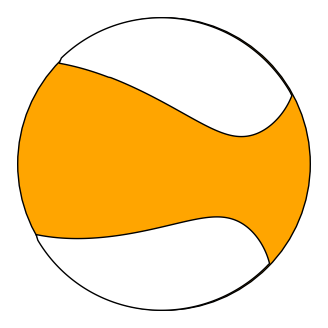

In [30]:
import matplotlib.pyplot as plt
from obspy.imaging.beachball import beach
import numpy as np
%matplotlib inline

# Moment tensor (Up, South, East)
mt = [
    mrr1,
    mtt1,
    mpp1,
    mrt1,
    mrp1,
    mtp1,
]

# Create figure and axes explicitly
fig, ax = plt.subplots(figsize=(4, 4))

# Create beachball (returns a PatchCollection)
width = 200
bb = beach(
    mt,
    xy=(0, 0),
    width=width,
    facecolor="orange",
    linewidth=1
)

# Add to axes
ax.add_collection(bb)
r = width / 1.9

# Scale the figure to fit the beachball
ax.set_xlim(-r, r)
ax.set_ylim(-r, r)

ax.set_aspect("equal")
ax.axis("off")

plt.savefig(
    f'search-event-cmt_plots/moment-tensor_{eventid}.png',
    dpi=300,
    bbox_inches="tight",
    pad_inches=0,
    transparent=True
)

plt.show()

# Plot the beachball

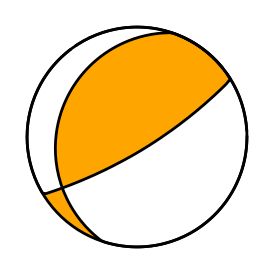

In [6]:
from obspy.imaging.mopad_wrapper import beachball
from obspy.imaging.mopad_wrapper import beach

strike = float(cmt['nodal-plane-1-strike'])
dip = float(cmt['nodal-plane-1-dip'])
rake = float(cmt['nodal-plane-1-rake'])

np1 = [strike, dip, rake] # strike, dip, rake for nodal plane 1
fig = beachball(np1, facecolor='orange')  



## Plot the Moment Tensor

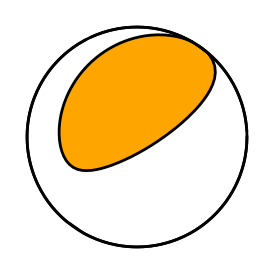

In [37]:

mrr = float(cmt['tensor-mrr'])
mtt = float(cmt['tensor-mtt'])
mpp = float(cmt['tensor-mpp'])
mrt = float(cmt['tensor-mrt'])
mrp = float(cmt['tensor-mrp'])
mtp = float(cmt['tensor-mtp'])


mt = [
    mrr,
    mtt,
    mpp,
    mrt,
    mrp,
    mtp,
]

fig = beachball(mt, facecolor='orange')     # "#d3e6e8"



## Get Finite Fault

In [7]:
ff_products = event.getProducts("finite-fault")
ff_products

[Product finite-fault from us updated 2025-11-19 21:56:04.802000 containing 16 content files.]